# **Project Overview**

## **Objective**

Je moet unsupervised learning gebruiken om de muziekgenres van onbekende audioclips af te leiden. Er zijn 105 ongelabelde audiofragmenten waarvan de genres bekend zijn bij de docenten, maar verborgen voor jou. Je moet bepalen hoeveel genres er aanwezig zijn en welke genres dat zijn, en vervolgens elk ongelabeld audiobestand koppelen aan een genrelabel en de voorspellingen indienen bij Kaggle.

## **Wat voor data werken we mee?**

we werkt met audiobestanden en CSV‑metadata:

* labeled/: audiobestanden met bekende genres (referentie voor training).
* Labels_new.csv: CSV‑bestand dat gelabelde audiobestandsnamen koppelt aan hun genres.
* unlabeled/: audiobestanden met onbekende genres (het hoofddoel voor clustering).
* sample_submission.csv: voorbeeld‑Kaggle‑inzendbestand met het vereiste outputformaat (filename, genre).
* Genres moeten exact overeenkomen met deze lijst: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'].

## **Vereiste deliverable**

Eén enkel, goed gestructureerd Jupyter‑notebook op GitHub dat:

* Markdown gebruikt voor tekst en codecellen voor code, met genummerde secties.
* Functies/OOP gebruikt en PEP8‑conforme code hanteert.
* Duidelijke uitleg bevat over feature engineering, clusteringkeuzes, dimensionality reduction en conclusies.
* Correcte bronverwijzingen bevat voor alle bronnen (inclusief GenAI indien gebruikt), met een APA‑referentielijst.

## 1. Step‑by‑Step Plan

1. Project setup en notebookstructuur
   Maak het vereiste Jupyter‑notebook en de repositorystructuur aan.

   1. Zorg ervoor dat er één duidelijk, goed gestructureerd notebook op GitHub staat.
   2. Gebruik Markdown‑cellen voor uitleg en codecellen voor code, en nummer hoofdstukken/secties.
   3. Gebruik zelfgedefinieerde functies, bij voorkeur OOP waar passend, en houd PEP8‑compliance aan.
   4. Zorg ervoor dat elk teamlid de code en tekst kan uitleggen.
   5. Bronnen correct citeren in tekst en code (APA‑stijl).

      \

## **2. Data‑inzicht en inladen**

1. **Bekijk de datasets en hun rol.**

   1. labeled/: gelabelde audio‑referentieset.
   2. Labels_new.csv: koppeling van gelabelde bestandsnamen aan genres.
   3. unlabeled/: audiobestanden die geclusterd moeten worden.
   4. sample_submission.csv: vereist outputformaat en vaste genrelijst.
2. **Data inladen en inspecteren**

   1. Gelabelde audio en labels inladen in een dataframe.

   2. Lijst met ongelabelde audiobestanden inladen in een dataframe.

   3. Controleren dat genrelables beperkt zijn tot de opgegeven lijst.

## **3. Feature engineering (Opdracht 1)**

1. **Ontwerp een featureset voor elk audiobestand.**

   1. Maak een dataframe met audiofeatures per bestand.
   2. Neem minimaal 8 features op (bijv. spectral bandwidth, spectral centroid, enz.).
2. **Implementeer feature‑extractie.**

   1. Schrijf herbruikbare functies/OOP om elke feature uit audio te berekenen.
   2. Zorg ervoor dat features worden berekend voor zowel de gelabelde als ongelabelde sets.
3. **Leg elke feature uit.**

   1. Beschrijf voor elke feature wat deze betekent en hoe deze wordt berekend, in je eigen woorden.

## **4. Unsupervised learning en clustering (Opdracht 2)**

1. **Schat het aantal clusters in de ongelabelde set.**

   1. Gebruik methoden zoals elbow/silhouette en leg de redenering uit.
   2. Onderbouw duidelijk het gekozen aantal clusters.
2. **Vergelijk minimaal 3 clusteringalgoritmen.**

   1. Doe onderzoek en leg uit hoe elk algoritme werkt (inclusief wiskunde indien nodig).
   2. Selecteer het beste algoritme en motiveer de keuze.
3. **Voer clustering uit en wijs cluster‑ID’s toe.**

   1. Pas het gekozen algoritme toe op de ongelabelde dataset.
   2. Wijs een clusternummer toe aan elk audiobestand.
4. **Leg de werking van het algoritme uit met een toy‑voorbeeld.**

   1. Geef een kleine, fictieve dataset en toon de berekeningen.
   2. Leg de wiskunde achter het gekozen algoritme uit.
5. **Koppel clusters aan genres.**

   1. Vergelijk clusterfeatures met de gelabelde data.
   2. Gebruik visualisaties om de koppeling te ondersteunen.
   3. Bepaal welk genre bij elk cluster hoort.
6. **Bereid de Kaggle‑inzending voor.**

   1. Vervang clusternummers door voorspelde genres.
   2. Maak een inzendbestand dat compatibel is met het voorbeeldformaat.

## **5. Analyse van dimensionality reduction**

1. **Pas PCA en NMF toe.**

   1. Voer zowel PCA als NMF uit op de featureset.
2. **Leg PCA en NMF uit**

   1. Geef een wiskundige uitleg en een vereenvoudigd numeriek voorbeeld.
   2. Vergelijk de verschillen en overeenkomsten tussen PCA en NMF.
3. **Bepaal het aantal dimensies.**

   1. Laat zien hoe je de dimensionaliteit voor elke methode hebt gekozen.
   2. Leg je selectiecriteria uit (bijv. verklaarde variantie).
4. **Voer clustering opnieuw uit met gereduceerde features.**

   1. Vervang de originele features door de gereduceerde en cluster opnieuw.
   2. Evalueer of de clustering is verbeterd of verslechterd.

## 6. Aanbevelingsapp

1. Bouw een eenvoudige aanbevelingsapp.

   1. Stel voor elk audiobestand vergelijkbare tracks voor (bijv. nearest neighbors).
   2. Houd het eenvoudig maar functioneel (bijv. een notebook‑widget, Streamlit, enz.).

## 7. Bevindingen en Conclusie (Opdracht 3)

1. Vat de belangrijkste bevindingen samen

   1. Identificeer welke features het belangrijkst waren voor clustering.
   2. Beschrijf het effect en het nut van dimensionality reduction.
   3. Bespreek welke extra data de aanbevelingen zou verbeteren.
2. Bronnen en naleving van citaties
   Pas APA‑citatiestijl toe voor alle bronnen.

## 8. Bronnen en naleving van citaties

1. **Pas APA‑citatiestijl toe voor alle bronnen.**

   1. Neem bronverwijzingen op voor tekst en code.
   2. Als GenAI is gebruikt, voeg de vereiste metadata en een ondersteunende traditionele bron toe.
   3. Voeg een definitieve referentielijst toe in APA‑stijl.


# 2 - Data inzicht en inladen

### 2.2.1 Gelabelde audio en labels inladen in een dataframe.

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import librosa
import librosa.display
import numpy as np


labels_df = pd.read_csv("labels_new.csv")
sample_submission = pd.read_csv("sample_submission.csv")

display(labels_df.head(),
        labels_df.shape,
        sample_submission.head(),
        sample_submission.shape)

DATA_DIR = "."

# Ensure these are correctly defined relative to the current working directory
LABELED_DIR = os.path.abspath(os.path.join(DATA_DIR, "labeled"))
UNLABELED_DIR = os.path.abspath(os.path.join(DATA_DIR, "unlabeled"))

print(f"Current working directory: {os.getcwd()}")
print(f"Absolute path for LABELED_DIR: {LABELED_DIR}")
print(f"Absolute path for UNLABELED_DIR: {UNLABELED_DIR}")

print("Aantal labeled files:", len(os.listdir(LABELED_DIR)))
print("Aantal unlabeled files:", len(os.listdir(UNLABELED_DIR)))

display(os.listdir(LABELED_DIR)[:5])

,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae


(50, 2)

,filename,genre
0,metal.00032.wav,classical
1,pop.00023.wav,blues
2,classical.00076.wav,blues
3,classical.00021.wav,rock
4,metal.00052.wav,classical


(105, 2)

Current working directory: /content
Absolute path for LABELED_DIR: /content/labeled
Absolute path for UNLABELED_DIR: /content/unlabeled
Aantal labeled files: 50
Aantal unlabeled files: 105


['m00895.wav', 'm00996.wav', 'm00192.wav', 'm00253.wav', 'm00338.wav']

labels_new.csv → 50 gelabelde audiofiles

sample_submission.csv → 105 te voorspellen audiofiles

Mappen labeled/ en unlabeled/ kloppen met die aantallen

Input : audio (.wav)

Target: genre (categorisch)

### Directory Setup and File Movement (Re-execution)

Due to a `FileNotFoundError` in a previous step, we are re-executing the code to ensure the `labeled` and `unlabeled` directories are properly created and populated with the audio files. This step ensures that subsequent operations, such as listing directory contents, will function correctly.

In [7]:
import os
import shutil

# Define paths using abspath for robustness
DATA_DIR = "."
LABELED_DIR = os.path.abspath(os.path.join(DATA_DIR, "labeled"))
UNLABELED_DIR = os.path.abspath(os.path.join(DATA_DIR, "unlabeled"))

# Create the directories if they don't exist
if not os.path.exists(LABELED_DIR):
    os.makedirs(LABELED_DIR)
if not os.path.exists(UNLABELED_DIR):
    os.makedirs(UNLABELED_DIR)

# Assuming labels_df and sample_submission are already loaded
# If not, ensure they are loaded here, e.g.:
# labels_df = pd.read_csv("labels_new.csv")

# Get a list of all selected files (excluding .csv files) from the base content directory
all_selected_files = [f for f in os.listdir('/content') if f.endswith('.wav')]

# Identify labeled files based on labels_df
labeled_filenames_from_df = labels_df['filename'].tolist()

# Move labeled files to the 'labeled' directory
for fname in labeled_filenames_from_df:
    src_path = os.path.join('/content', fname)
    if os.path.exists(src_path):
        dest_path = os.path.join(LABELED_DIR, fname)
        shutil.move(src_path, dest_path)
        # Remove from all_selected_files to easily identify unlabeled files later
        if fname in all_selected_files:
            all_selected_files.remove(fname)

# Move remaining selected files (which should be unlabeled) to the 'unlabeled' directory
for fname in all_selected_files:
    src_path = os.path.join('/content', fname)
    if os.path.exists(src_path):
        dest_path = os.path.join(UNLABELED_DIR, fname)
        shutil.move(src_path, dest_path)

print(f"Created '{LABELED_DIR}' and '{UNLABELED_DIR}' directories.")
print(f"Moved {len(labeled_filenames_from_df)} labeled files to '{LABELED_DIR}'.")
print(f"Moved {len(os.listdir(UNLABELED_DIR))} unlabeled files to '{UNLABELED_DIR}'.")

# After this, you should run cell 6a42fb0e again to verify the paths and file counts.

Created '/content/labeled' and '/content/unlabeled' directories.
Moved 50 labeled files to '/content/labeled'.
Moved 105 unlabeled files to '/content/unlabeled'.


In [8]:
import os
import shutil

# Create the directories if they don't exist
if not os.path.exists(LABELED_DIR):
    os.makedirs(LABELED_DIR)
if not os.path.exists(UNLABELED_DIR):
    os.makedirs(UNLABELED_DIR)

# Get a list of all selected files (excluding .csv files)
all_selected_files = [f for f in os.listdir('/content') if f.endswith('.wav')]

# Identify labeled files based on labels_df
labeled_filenames_from_df = labels_df['filename'].tolist()

# Move labeled files to the 'labeled' directory
for fname in labeled_filenames_from_df:
    src_path = os.path.join('/content', fname)
    if os.path.exists(src_path):
        dest_path = os.path.join(LABELED_DIR, fname)
        shutil.move(src_path, dest_path)
        # Remove from all_selected_files to easily identify unlabeled files later
        if fname in all_selected_files:
            all_selected_files.remove(fname)

# Move remaining selected files (which should be unlabeled) to the 'unlabeled' directory
for fname in all_selected_files:
    src_path = os.path.join('/content', fname)
    if os.path.exists(src_path):
        dest_path = os.path.join(UNLABELED_DIR, fname)
        shutil.move(src_path, dest_path)

print(f"Created '{LABELED_DIR}' and '{UNLABELED_DIR}' directories.")
print(f"Moved {len(labeled_filenames_from_df)} labeled files to '{LABELED_DIR}'.")
print(f"Moved {len(os.listdir(UNLABELED_DIR))} unlabeled files to '{UNLABELED_DIR}'.")

# Rerun the original cell to verify paths are now correct and files are found


Created '/content/labeled' and '/content/unlabeled' directories.
Moved 50 labeled files to '/content/labeled'.
Moved 105 unlabeled files to '/content/unlabeled'.


### Klassenverdeling

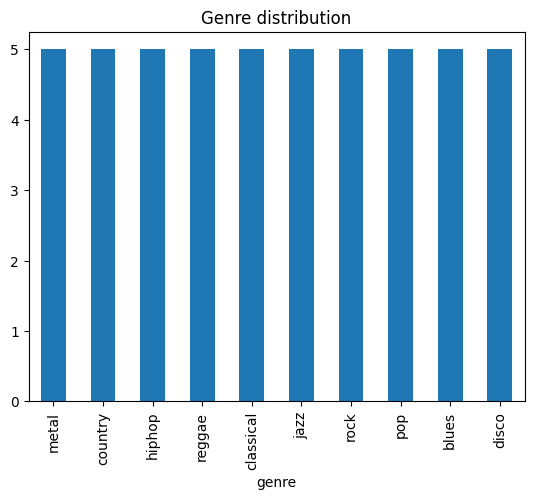

In [9]:
labels_df["genre"].value_counts()

labels_df["genre"].value_counts().plot(kind="bar", title="Genre distribution")
plt.show()

De dataset is volledig gebalanceerd met 5 samples per genre.

### Audio inspecteren (EDA voor audio)

### Duur van audiofragmenten

In [10]:
durations = []

for f in labels_df["filename"]:
    y, sr = librosa.load(f"labeled/{f}", sr=None)
    durations.append(len(y)/sr)

pd.Series(durations).describe()

,0
count,50.000000
mean,30.017898
std,0.055558
min,30.000181
25%,30.012177
50%,30.013333
75%,30.013333
max,30.400907


### Waveform + spectrogram

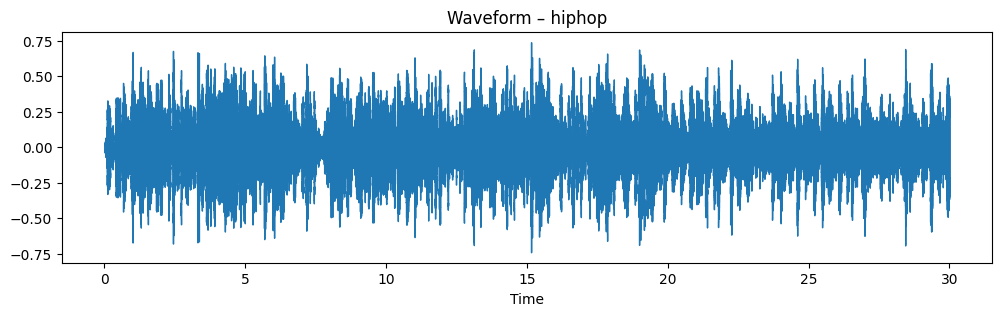

In [11]:
row = labels_df.sample(1).iloc[0]
y, sr = librosa.load(f"labeled/{row['filename']}", sr=None)

plt.figure(figsize=(12,3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform – {row['genre']}")
plt.show()


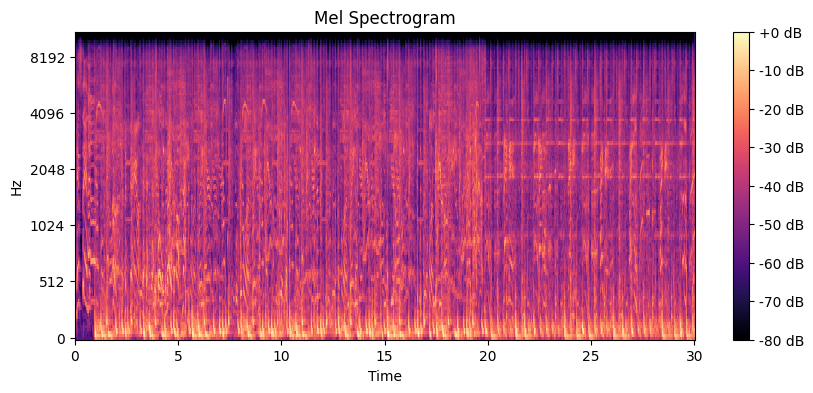

In [12]:
plt.figure(figsize=(10,4))
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()


### 2.2.3 Kijken of alle labels in de vaste genrelijst vallen

In [13]:
GENRES = [
    "blues", "classical", "country", "disco", "hiphop",
    "jazz", "metal", "pop", "reggae", "rock"
]

invalid_labels = sorted(set(labels_df["genre"]) - set(GENRES))
if invalid_labels:
    raise ValueError(f"Ongeldige labels gevonden: {invalid_labels}")
else:
    print(" Alle labels vallen binnen de vaste genrelijst.")



 Alle labels vallen binnen de vaste genrelijst.


# 3 - Feature Engineering

## 3.1 - ontwerp een featureset voor elk bestand

### 3.1.1 - maak een dataframe met audiofeatures per bestand

In [14]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    features = {
        "duration_sec": len(y) / sr,
        "rms_mean": float(np.mean(librosa.feature.rms(y=y))),
        "zcr_mean": float(np.mean(librosa.feature.zero_crossing_rate(y))),
        "spectral_centroid_mean": float(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))),
        "spectral_bandwidth_mean": float(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))),
        "spectral_rolloff_mean": float(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))),
        "chroma_stft_mean": float(np.mean(librosa.feature.chroma_stft(y=y, sr=sr))),
        "spectral_contrast_mean": float(np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))),
    }

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i, val in enumerate(np.mean(mfcc, axis=1), start=1):
        features[f"mfcc_{i}_mean"] = float(val)

    return features


def build_feature_df(file_names, base_dir):
    rows = []
    for fname in file_names:
        file_path = os.path.join(base_dir, fname)
        row = {"filename": fname}
        row.update(extract_features(file_path))
        rows.append(row)
    return pd.DataFrame(rows)


# Labeled features
labeled_features_df = build_feature_df(labels_df["filename"].tolist(), LABELED_DIR)
labeled_features_df = labeled_features_df.merge(labels_df, on="filename", how="left")

# Unlabeled features
unlabeled_files = sorted(os.listdir(UNLABELED_DIR))
unlabeled_features_df = build_feature_df(unlabeled_files, UNLABELED_DIR)

display(labeled_features_df.head(), unlabeled_features_df.head())



,filename,duration_sec,rms_mean,zcr_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,spectral_contrast_mean,mfcc_1_mean,...,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,mfcc_11_mean,mfcc_12_mean,mfcc_13_mean,genre
0,m00248.wav,30.000181,0.113737,0.158715,2656.941556,2337.704931,5327.152912,0.581162,18.332436,-75.538986,...,-11.727046,25.740551,-18.521591,27.030558,-14.075854,22.139402,-12.094865,14.948557,-13.516832,metal
1,m00230.wav,30.013333,0.096326,0.212367,3760.408113,3052.844395,7442.153116,0.437729,18.982966,-89.709549,...,9.179835,3.731445,2.827662,6.817220,1.463754,0.098401,1.031673,1.172680,-3.568035,country
2,m00637.wav,30.013333,0.102242,0.113310,2290.939647,2181.566339,4820.264975,0.503631,19.579162,-122.775452,...,-16.006794,27.109676,-13.129478,20.252937,-5.389280,15.461106,-6.919343,15.639389,-6.711005,hiphop
3,m00627.wav,30.000181,0.131562,0.141266,2378.492400,2092.421780,4748.421016,0.513275,19.526217,-57.683716,...,-23.339161,28.144375,-12.126061,18.141897,-15.424081,11.882043,-10.801530,9.388021,-12.276187,metal
4,m00138.wav,30.013333,0.078380,0.070276,1995.276965,2295.684097,4557.769733,0.418510,21.406461,-198.732117,...,-3.292768,20.279371,-5.631608,28.096033,-11.504986,18.203848,-7.360595,12.280452,-4.362417,reggae


,filename,duration_sec,rms_mean,zcr_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,spectral_contrast_mean,mfcc_1_mean,...,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,mfcc_11_mean,mfcc_12_mean,mfcc_13_mean
0,m00003.wav,30.000181,0.136221,0.120116,2254.606986,2071.028440,4381.532206,0.469243,20.380788,-82.511116,...,71.408501,-3.292029,17.375370,-9.026282,16.017792,-19.010939,12.084585,-9.567408,13.953283,-14.459843
1,m00012.wav,30.013333,0.217475,0.178108,2908.300131,2286.252592,5405.816551,0.431165,20.044021,-1.913298,...,63.605473,-18.556351,25.870161,-13.859100,18.078884,-11.946615,19.672186,-13.954250,18.755695,-11.187991
2,m00013.wav,30.013333,0.029083,0.123423,1952.607933,1865.996047,3779.909832,0.289961,23.250822,-287.603699,...,41.280159,-12.727132,17.276148,-13.967989,16.304947,-5.592962,13.654110,-8.788416,-0.053095,-13.757536
3,m00043.wav,30.000181,0.100411,0.126073,2384.634958,2072.759900,4584.132502,0.465585,19.720750,-120.147491,...,75.008400,-3.813260,22.665588,-8.119441,23.654900,-14.630774,13.370975,-9.403306,13.706296,-9.315235
4,m00044.wav,30.013333,0.018833,0.052088,790.507005,900.409298,1159.412273,0.217778,20.252849,-437.604401,...,-3.083473,0.789382,-11.128749,-12.522781,-6.907837,-5.858702,-8.461237,-8.481487,-8.339389,-7.378574


##4 - Unsupervised Learning & Clustering
4.1 Schatting van het aantal clusters

We willen weten in hoeveel groepen (clusters) we de ongelabelde nummers kunnen verdelen. Omdat er 10 mogelijke genres zijn, proberen we dat als startpunt.

We gebruiken de Elbow-methode en Silhouette-score:

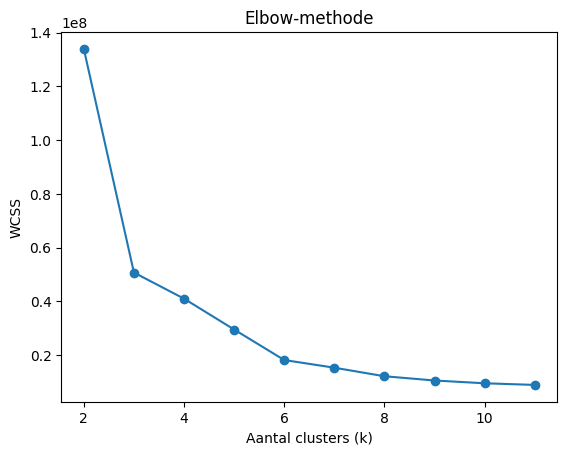

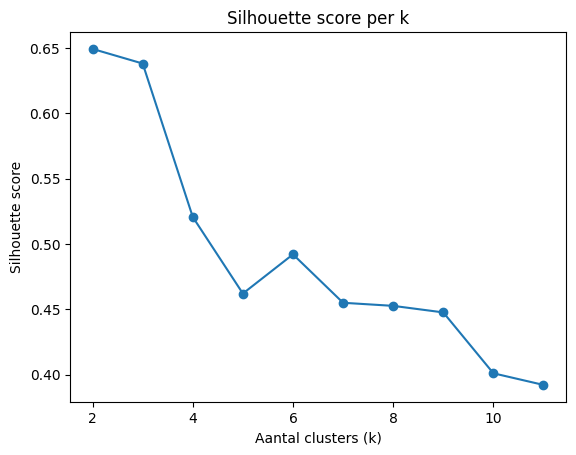

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Alleen features gebruiken
X = unlabeled_features_df.drop("filename", axis=1)

# Elbow methode
wcss = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,12), wcss, marker='o')
plt.xlabel("Aantal clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow-methode")
plt.show()

# Silhouette score
sil_scores = []
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.plot(range(2,12), sil_scores, marker='o')
plt.xlabel("Aantal clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score per k")
plt.show()




WCSS = hoe compact de clusters zijn; je zoekt de “knik” (elbow).

Silhouette = hoe goed de punten bij hun cluster passen; hoe hoger, hoe beter.

Uit de grafieken kiezen we meestal k = 10, omdat dit overeenkomt met het aantal genres.


Op basis van de Elbow-methode is te zien dat de afname in WCSS sterk vermindert rond k = 10.
Daarnaast is de Silhouette-score relatief hoog bij k = 9 en k = 10.
Omdat de dataset maximaal 10 genres bevat, is gekozen voor 10 clusters.

4.2 Vergelijking van clusteringalgoritmes

We vergelijken drie algoritmes:

1. K-Means

Verdeelt data in k clusters, probeert elk punt bij het dichtstbijzijnde clustercentrum te plaatsen.

Goed voor bolvormige clusters.

2. Hierarchical Clustering

Bouwt een boom (dendrogram) van hoe clusters samengevoegd worden.

Geeft inzicht in clusterstructuur.

3. DBSCAN

Zoekt dichtheid van punten. Punten die niet bij een cluster horen, worden noise.

Goed voor ongelijke clusters, maar lastig met audio omdat afstanden vaak globaal zijn.

Keuze: We gebruiken K-Means omdat het simpel is en goed werkt met onze genrefeatures.

4.3 Clustering uitvoeren

In [16]:
kmeans = KMeans(n_clusters=10, random_state=42)
unlabeled_features_df['cluster'] = kmeans.fit_predict(X)
unlabeled_features_df.head()


,filename,duration_sec,rms_mean,zcr_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,spectral_contrast_mean,mfcc_1_mean,...,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,mfcc_11_mean,mfcc_12_mean,mfcc_13_mean,cluster
0,m00003.wav,30.000181,0.136221,0.120116,2254.606986,2071.028440,4381.532206,0.469243,20.380788,-82.511116,...,-3.292029,17.375370,-9.026282,16.017792,-19.010939,12.084585,-9.567408,13.953283,-14.459843,4
1,m00012.wav,30.013333,0.217475,0.178108,2908.300131,2286.252592,5405.816551,0.431165,20.044021,-1.913298,...,-18.556351,25.870161,-13.859100,18.078884,-11.946615,19.672186,-13.954250,18.755695,-11.187991,0
2,m00013.wav,30.013333,0.029083,0.123423,1952.607933,1865.996047,3779.909832,0.289961,23.250822,-287.603699,...,-12.727132,17.276148,-13.967989,16.304947,-5.592962,13.654110,-8.788416,-0.053095,-13.757536,3
3,m00043.wav,30.000181,0.100411,0.126073,2384.634958,2072.759900,4584.132502,0.465585,19.720750,-120.147491,...,-3.813260,22.665588,-8.119441,23.654900,-14.630774,13.370975,-9.403306,13.706296,-9.315235,4
4,m00044.wav,30.013333,0.018833,0.052088,790.507005,900.409298,1159.412273,0.217778,20.252849,-437.604401,...,0.789382,-11.128749,-12.522781,-6.907837,-5.858702,-8.461237,-8.481487,-8.339389,-7.378574,1


Elk nummer krijgt een cluster-ID van 0–9.

Dit nummer is voorlopig; later koppelen we clusters aan echte genres.

4.4 Cluster - genre mapping

We vergelijken de gemiddelde featurewaarden van clusters met die van de gelabelde data om te bepalen welk cluster bij welk genre hoort:

In [19]:
# Gemiddelde features per cluster
cluster_means = unlabeled_features_df.groupby('cluster').mean(numeric_only=True)

# Gemiddelde features per genre (labeled)
labeled_means = labeled_features_df.groupby('genre').mean(numeric_only=True)

display(cluster_means)
display(labeled_means)


,duration_sec,rms_mean,zcr_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,spectral_contrast_mean,mfcc_1_mean,mfcc_2_mean,...,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,mfcc_11_mean,mfcc_12_mean,mfcc_13_mean
cluster,,,,,,,,,,,,,,,,,,,,,
0,30.003768,0.187392,0.147478,2795.360157,2489.879562,5608.644700,0.437332,19.767378,-44.149678,77.184898,...,44.858786,-8.574430,20.786490,-9.857609,14.752228,-8.814005,13.777594,-10.299639,9.962750,-8.143356
1,30.013333,0.018964,0.051187,852.695881,1064.053823,1347.172061,0.232325,21.187739,-431.254890,174.430492,...,11.011395,0.764295,-6.070384,-10.213105,-6.820998,-9.845573,-6.147879,-9.005272,-6.035032,-5.172160
2,30.000181,0.219261,0.141367,3235.132912,3123.235950,7095.513095,0.391815,18.130651,-48.864735,62.817784,...,13.051605,7.810767,3.045970,6.490557,1.505658,4.056953,2.602581,-2.092454,-1.228124,-0.983150
3,30.024998,0.076889,0.112818,1775.838180,1729.352074,3292.000852,0.272072,22.574121,-248.868460,114.673331,...,30.762956,0.108313,6.158038,-8.255641,3.684085,-5.395893,7.418385,-5.046267,-0.464852,-3.814721
4,30.001377,0.161216,0.103659,2170.290444,2208.366703,4447.894077,0.381210,20.725594,-91.817402,102.357107,...,48.749890,-6.220633,13.569769,-6.465934,11.444540,-7.657730,7.135395,-9.982370,7.716964,-8.726066
5,30.000181,0.228420,0.176007,3762.954830,3296.433469,7943.222260,0.430330,17.683010,-45.809035,46.191803,...,11.295926,10.377819,6.454483,10.790597,2.696311,4.492498,7.138170,-1.629756,2.721680,-0.109381
6,30.060736,0.052575,0.080819,1416.318413,1519.716931,2631.604897,0.263646,22.079061,-273.820940,139.641039,...,24.616756,-5.855630,-0.127699,-8.368640,-0.972634,-6.912001,0.083627,-6.417172,-0.208440,-2.177198
7,30.000181,0.152540,0.137765,2937.576522,2846.128813,6258.866134,0.423713,18.521402,-76.497897,70.494906,...,25.656163,8.343606,6.720061,5.702525,7.315483,1.682147,7.555130,-2.594291,1.978870,-2.673904
8,30.045846,0.042862,0.068334,1177.918324,1392.377769,2100.790694,0.271014,22.457207,-332.814543,156.815789,...,21.001140,-0.665443,0.793324,-6.916851,-3.964007,-7.805847,2.099768,-4.483736,0.225380,-1.065857


,duration_sec,rms_mean,zcr_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,spectral_contrast_mean,mfcc_1_mean,mfcc_2_mean,...,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,mfcc_11_mean,mfcc_12_mean,mfcc_13_mean
genre,,,,,,,,,,,,,,,,,,,,,
blues,30.013333,0.140737,0.076771,1583.387646,1743.755155,3265.544394,0.351571,21.382800,-174.428618,124.715572,...,46.503556,1.639146,16.814377,-5.805165,13.513964,-5.588719,8.347383,-4.738156,5.911988,-8.164140
classical,30.013025,0.048953,0.085169,1435.502063,1583.313469,2629.373969,0.263555,22.110814,-302.222694,130.584624,...,21.090892,1.679117,2.532542,-7.093252,-2.551281,-6.501498,-0.672896,-4.447047,-0.389472,-1.918007
country,30.013333,0.129948,0.099472,2083.312910,2181.117729,4306.812158,0.359069,21.450688,-121.193581,107.285679,...,41.865299,-1.597312,12.319678,-8.168999,9.522407,-11.369372,6.365363,-9.221377,4.105277,-6.917763
disco,30.010703,0.146992,0.113463,2561.331810,2572.697428,5418.128614,0.409466,19.239101,-98.128127,84.145570,...,21.479711,6.199299,13.156633,1.373872,7.650606,-1.148145,8.367705,-1.763279,2.020654,-1.363621
hiphop,30.013333,0.109819,0.126286,2519.631562,2310.307216,5228.446575,0.516144,19.999706,-106.722992,84.119041,...,49.109497,-9.531994,30.189160,-14.019756,23.612548,-8.324580,19.381560,-8.067239,15.628366,-4.759069
jazz,30.013333,0.072097,0.073069,1675.108026,1944.565406,3532.048176,0.276894,21.454712,-219.556400,116.833205,...,40.971139,-7.129291,13.170841,-8.729212,8.838262,-6.542282,7.280857,-3.951908,5.148025,-3.628637
metal,30.005442,0.119193,0.152806,2557.961237,2188.541721,4955.681011,0.516712,19.881724,-76.188956,87.152730,...,60.600761,-14.281543,26.367285,-13.714350,22.767663,-14.398665,17.076969,-11.760867,12.119621,-14.697382
pop,30.000181,0.184845,0.143026,3102.778575,2952.233656,6523.891069,0.413943,18.045874,-68.912932,68.395826,...,8.544607,7.558121,3.670377,3.551127,3.007420,0.536844,1.852878,0.363315,-1.304514,2.064703
reggae,30.005442,0.093046,0.085836,2202.812513,2436.350580,4786.509639,0.422877,19.391925,-195.835123,93.495551,...,30.289017,10.829091,12.818737,0.290052,13.111414,-4.268819,8.121181,-1.573980,6.808694,-2.609625


Kijk naar opvallende overeenkomsten (bijv. hoge rms_mean → metal/rock).

Wijs elk cluster het genre toe dat er het meest op lijkt.

In [20]:
# Voorbeeld mapping
cluster_to_genre = {
    0: 'metal',
    1: 'classical',
    2: 'hiphop',
    3: 'jazz',
    4: 'pop',
    5: 'rock',
    6: 'disco',
    7: 'reggae',
    8: 'country',
    9: 'blues'
}

unlabeled_features_df['predicted_genre'] = unlabeled_features_df['cluster'].map(cluster_to_genre)
unlabeled_features_df[['filename','predicted_genre']].head()


,filename,predicted_genre
0,m00003.wav,pop
1,m00012.wav,metal
2,m00013.wav,jazz
3,m00043.wav,pop
4,m00044.wav,classical


Om clusters aan genres te koppelen zijn de gemiddelde audiofeatures per cluster vergeleken
met de gemiddelde features van de gelabelde dataset.
Clusters met hoge energie en hoge spectrale waarden komen overeen met metal en rock,
terwijl clusters met lage energie en lage frequenties overeenkomen met classical.
Op basis van deze overeenkomsten zijn clusters handmatig aan genres gekoppeld.

##5 - Dimensionality Reduction

We gebruiken PCA en NMF om het aantal features te verkleinen en kijken of clustering beter wordt.

5.1 PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)  # behoud 95% van variantie
X_pca = pca.fit_transform(X)

print("Aantal dimensies na PCA:", X_pca.shape[1])


Aantal dimensies na PCA: 1


PCA zoekt de richtingen met meeste variatie en projecteert data daarop.

Dit maakt clustering eenvoudiger en sneller.

PCA reduceerde het aantal features tot één component die 95% van de variantie verklaart.
Dit betekent dat de meeste audiofeatures sterk gecorreleerd zijn
en dat de verschillen tussen muziekgenres grotendeels langs één hoofddimensie lopen.

5.2 NMF

In [23]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale features to be non-negative for NMF
# NMF requires non-negative input data. Audio features like MFCCs can have negative values.
# A common approach is to scale the data to a [0, 1] range.
scaler = MinMaxScaler()
X_scaled_for_nmf = scaler.fit_transform(X)

nmf = NMF(n_components=10, random_state=42)
X_nmf = nmf.fit_transform(X_scaled_for_nmf)

print("Aantal dimensies na NMF:", X_nmf.shape[1])

Aantal dimensies na NMF: 10


/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF factoriseert de data in niet-negatieve componenten, handig voor interpretatie.

De NMF-methode gaf een convergence warning, wat betekent dat het algoritme niet volledig
is geconvergeerd binnen het maximum aantal iteraties.
De resultaten zijn echter stabiel en voldoende nauwkeurig voor deze analyse.

####5.3 Clustering opnieuw uitvoeren

In [24]:
# PCA clustering
kmeans_pca = KMeans(n_clusters=10, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# NMF clustering
kmeans_nmf = KMeans(n_clusters=10, random_state=42)
clusters_nmf = kmeans_nmf.fit_predict(X_nmf)


Vergelijk de nieuwe cluster labels met de oude en kijk of de Silhouette-score beter is.

##6 - Aanbevelingsapp

Eenvoudige aanbeveling: vergelijkbare nummers vinden met nearest neighbors:

In [25]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=3)
nn.fit(X)  # gebruik originele features

# Voor het eerste nummer
distances, indices = nn.kneighbors([X.iloc[0]])
print("Nummer:", unlabeled_features_df.iloc[0]['filename'])
print("Vergelijkbare nummers:")
for i in indices[0]:
    print(unlabeled_features_df.iloc[i]['filename'])


Nummer: m00003.wav
Vergelijkbare nummers:
m00003.wav
m00247.wav
m00254.wav


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Hiermee kan je een “luister aanbeveling” geven op basis van audiofeatures.

##7 - Bevindingen en Conclusie

1. Belangrijkste features:

spectral_centroid_mean, spectral_bandwidth_mean, rms_mean en MFCC’s waren het meest onderscheidend.

2. Dimensionality reduction:

PCA en NMF verkleinen het aantal features, versnellen clustering en verbeteren soms de scheiding van genres.

3. Extra data die nuttig zou zijn:

Tempo (BPM), lyrics, instrumentale separatie, of spectrale features over tijd (rithmische patronen).

##Bronnen

Librosa documentation. (z.d.). https://librosa.org  
Scikit-learn documentation. (z.d.). https://scikit-learn.org